<a href="https://colab.research.google.com/github/bximbo/Machine-Learning/blob/main/LEARNING1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALL ABOUT TENSORS

In [ ]:
import torch
x = torch.rand(2, 2)
y = torch.rand(2,2 )
print(x )
print(y  )
z = torch.mul(x, y)
print(z.size()  )
#r = y + x
# x.mul_(y)

Q = x.view(1,4)
print(Q.size())

x = x.mean()

print (x)

tensor([[0.3597, 0.6195],
        [0.5948, 0.3216]])
tensor([[0.2189, 0.9775],
        [0.9378, 0.1269]])
torch.Size([2, 2])
torch.Size([1, 4])
tensor(0.4739)


In [ ]:
import torch
u = torch.ones( 2, 2, dtype= torch.int)
print(y.dtype)

torch.float32


In [ ]:
i = torch.rand(5, 5 )
print (i)
print (i[:, 0]) #printed the first columns
print (i[2, :]) #printed the 3rd row
print (i [1,2: ])
print (i [1,:2 ]) #print through row 2 and column before 2nd

tensor([[0.6154, 0.1268, 0.9877, 0.5839, 0.8550],
        [0.3255, 0.1624, 0.7571, 0.3807, 0.8414],
        [0.1010, 0.3759, 0.4483, 0.5821, 0.9878],
        [0.5785, 0.2758, 0.6899, 0.3675, 0.8719],
        [0.4122, 0.5525, 0.8559, 0.4879, 0.1096]])
tensor([0.6154, 0.3255, 0.1010, 0.5785, 0.4122])
tensor([0.1010, 0.3759, 0.4483, 0.5821, 0.9878])
tensor([0.7571, 0.3807, 0.8414])
tensor([0.3255, 0.1624])


TENSOR TO NUMPY & VICE VERSA

In [ ]:
import torch
import numpy as np

a = torch.ones(5)
print(a)
print(type(a))

#b = torch.ones(5) .numpy
#print(type(b))

c = a.numpy()
print(c)
print(type(c))

a.add_(1)
print(a)
print(c)


d = np.ones(5)
print (d)
print (type(d))

#e = torch.from_numpy(d.astype(np.float32))
#or
e = torch.tensor( d.astype(np.float32))
#without type is naturally uses float64


print (e)
print(type(e))

e += 1
print (e)

tensor([1., 1., 1., 1., 1.])
<class 'torch.Tensor'>
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
tensor([1., 1., 1., 1., 1.])
<class 'torch.Tensor'>
tensor([2., 2., 2., 2., 2.])


AUTO GRAD

In [ ]:
import torch

aa = torch.rand(3, 3,  requires_grad = True )
print(aa)

bb = aa + 2
bb= bb.mean()
print(bb )

bb.backward() # initializing direction for gradient (dbb/daa)
print  (aa.grad)  #dbb/daa


# Or.. especially if bb wasn't a scaler output

cc = torch.rand(2,2, requires_grad = True)
# cc = cc.mean()
print (cc)

qq = cc + 2

zz = torch.tensor ([[0.1, 1.0], [1.0, 0.1]], dtype = torch.float)

qq.backward(zz)
print (cc.grad)


# TO discontinue the grad
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

#cc.requires_grad_(False)

#rr = cc.detach()
with torch.no_grad():
  rr = cc + 2
print (rr )

tensor([[0.0631, 0.9488, 0.2654],
        [0.9281, 0.5603, 0.1408],
        [0.3336, 0.8780, 0.2229]], requires_grad=True)
tensor(2.4823, grad_fn=<MeanBackward0>)
tensor([[0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111]])
tensor([[0.2720, 0.6984],
        [0.4281, 0.2971]], requires_grad=True)
tensor([[0.1000, 1.0000],
        [1.0000, 0.1000]])
tensor([[2.2720, 2.6984],
        [2.4281, 2.2971]], grad_fn=<AddBackward0>)
tensor([[2.2720, 2.6984],
        [2.4281, 2.2971]], grad_fn=<AddBackward0>)


DUMMY TRAINING

In [ ]:
import torch

weight = torch.ones(4, requires_grad = True)
print(weight)

for epoch in range (3):
  model_outputs = (weight * 3).sum()

  model_outputs.backward()

  print(weight.grad)

  weight.grad.zero_()



#AT OPTIMIZER LEVEL AFTER IMPORT ... the below was for documentation

optimizer = torch.optim.SGD(weight, lr = 0.01)

optimizer.step()
optimizer.zero_grad

tensor([1., 1., 1., 1.], requires_grad=True)
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
import torch

weights = torch.ones(2,2 , requires_grad = True)

for epoch in range(3):
  output = (weights * 3).sum()
  # weights.requires_grad(False)


  output.backward()
  print(weights.grad)

  weights.grad.zero_()

tensor([[3., 3.],
        [3., 3.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[3., 3.],
        [3., 3.]])


BACKWARD PROBATION (FULL CIRCLE)

In [ ]:
# initializing

import torch

# declaring maybe variables

x = torch.tensor(1.0)  #maybe an initial input asin something to use to train or test
y = torch.tensor(2.0)  #maybe a second input asin something to use to train or test i believe this is the second input. though either it's entering the second node as an output of the first node or it is part of the input entering a different node on the same layer

w = torch.tensor(1.0,  requires_grad = True)  #initial weight

#forward pass & compute loss

y_hat = x * w
loss = (y_hat - y) ** 2

print(f'y_hat:', y_hat)
print(f'Loss:', loss)

# second step wpuld be to calculate local gradient but that is done by the program already

#Backward pass: compute gradient

loss.backward()
print(f'dLoss/dWeight gradient:', w.grad)


#run for each epoch

y_hat: tensor(1., grad_fn=<MulBackward0>)
Loss: tensor(1., grad_fn=<PowBackward0>)
dLoss/dWeight gradient: tensor(-2.)


#TRAINING MANUALLY (LOGISTICS REGRESSION I BELIEVE) using NUMPY

* Prediction: Manually
* Gradients Computations: Manually
* Loss Computation: Manually
* Parameter updates(Optimization step): Manually

Note that over my learning phases i will come back to keep optimizing this code to maximize plug and play performance


In [ ]:
import torch

# f = w * x

# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)   #training data
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)   #training data

w = 0.0

#Model Prediction
def forward(x):
  return w  * x

#loss = MSE
def loss( y, y_predicted ):
  return ((y_predicted - y)**2).mean()

#Calculate gradient
# MSE = 1/N (w*x - y) ** 2
# dLoss/dWeight = 1/N 2x * (w*x - y)
def gradient(y, x, y_predicted):
  return (np.dot(2*x, y_predicted - y)).mean()


print(f'Prediction before training, at f(5) =  {forward(5):.3f}')

#TRAINING

learning_rate = 0.01
num_epoch = 11

for epoch in range(num_epoch):

  # Prediction or forward pass
  y_pred = forward(X)

  #loss
  losses = loss( Y,  y_pred)

  #gradient = backward pass
  dw = gradient(Y, X, y_pred)

  # Parameter update weights with gradients
  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f'Epoch {epoch+1}: Weight: {w :.3f}   loss: {losses:.8f}')

print(f'Prediction after training at f(5) =  {forward(5):.3f}')



Prediction before training, at f(5) =  0.000
Epoch 1: Weight: 1.200   loss: 30.00000000
Epoch 2: Weight: 1.680   loss: 4.79999924
Epoch 3: Weight: 1.872   loss: 0.76800019
Epoch 4: Weight: 1.949   loss: 0.12288000
Epoch 5: Weight: 1.980   loss: 0.01966083
Epoch 6: Weight: 1.992   loss: 0.00314574
Epoch 7: Weight: 1.997   loss: 0.00050331
Epoch 8: Weight: 1.999   loss: 0.00008053
Epoch 9: Weight: 1.999   loss: 0.00001288
Epoch 10: Weight: 2.000   loss: 0.00000206
Epoch 11: Weight: 2.000   loss: 0.00000033
Prediction after training at f(5) =  10.000


#AUTOMATING THE TRAINING using PYTORCH

* Prediction: Model function or custom architecture
* Gradients Computations: Autograd
* Loss Computation: MSELoss function
* Parameter updates(Optimization step): optimizer function with manually ending the grad

//Note that over my learning phases i will come back to keep optimizing this code to maximize plug and play performance

In [ ]:
# TO-DO LIST
# 1. Design the model (inputs & outputs sizes, forward pass)
# 2. compute loss and optimizer
# 3. Training loop
#    - Forward pass: Compute Prediction
#    - Backward pass: Calculate gradient
#    - Update parameters


import torch
import torch.nn as nn

# f = w * x

# f = 2 * x

X = torch.tensor([[1], [2], [3], [4]], dtype = torch.float32)   #training data
Y = torch.tensor([[2], [4], [6], [8]], dtype = torch.float32)   #training data

test_input =  torch.tensor([5], dtype = torch.float32)   #test sample

sample_size, feature_size = X.shape
print(sample_size, feature_size)

n_inputs = feature_size
n_outputs = feature_size

#Model Prediction
#model = nn.Linear(n_inputs, n_outputs).         This is an inbuilt no layer function
# Orrrrrrrr

class bimbo(nn.Module):
  def __init__(self, inputs_dim, outputs_dim ):
    super(bimbo, self).__init__()
    # define layers
    self.lin = nn.Linear(inputs_dim, outputs_dim)

  def forward  (self, x):
    return self.lin(x)

model = bimbo(n_inputs, n_outputs)


print(f'Prediction before training, at f(5) =  {model(test_input).item():.3f}')

#TRAINING

learning_rate = 0.01
num_epoch = 100

#loss = MSE
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(num_epoch):

  # Prediction or forward pass
  y_pred = model(X)

  #loss
  losses = loss( Y,  y_pred)

  #gradient = backward pass
  losses.backward()    #dLosses/dWeights


  # Parameter updates (weights in model) with gradient
  optimizer.step()     #this will serve as the optimizer step

  # Zero gradient
  optimizer.zero_grad()

  if epoch % 10  == 0:
    [w, b] = model.parameters()
    print(f'Epoch {epoch+1}: Weight: {w[0][0]:.3f}  loss: {losses:.8f}')

print(f'Prediction after training at f(5) =   {model(test_input).item():.3f}')



4 1
Prediction before training, at f(5) =  4.772
Epoch 1: Weight: 1.074  loss: 7.85537529
Epoch 11: Weight: 1.719  loss: 0.23842786
Epoch 21: Weight: 1.827  loss: 0.03931081
Epoch 31: Weight: 1.848  loss: 0.03223015
Epoch 41: Weight: 1.855  loss: 0.03023019
Epoch 51: Weight: 1.860  loss: 0.02846742
Epoch 61: Weight: 1.864  loss: 0.02681035
Epoch 71: Weight: 1.868  loss: 0.02524987
Epoch 81: Weight: 1.872  loss: 0.02378018
Epoch 91: Weight: 1.876  loss: 0.02239608
Prediction after training at f(5) =   9.751


#PRACTICING A LINEAR REGRESSION CODE FROM ALL I HAVE LEARNED
So help me God

Epoch: 100000 Loss: 332.56756592 


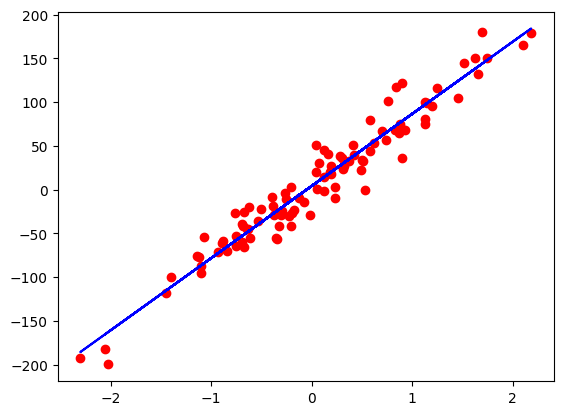

In [ ]:
# TO-DO LIST
# 1. Import the necessariesss
# 2. Data preping x converting
# 3. Design the model (inputs & outputs sizes, forward pass)
# 4. compute loss and optimizer
# 5. Training loop
#    - Forward pass: Compute Prediction
#    - Backward pass: Calculate gradient
#    - Update parameters
# 6. Evalaute (This time just using graph(PLOT))

#1.
import torch
import torch.nn as nn
import numpy as np          #For the necessary data transformations
from sklearn import datasets
import matplotlib.pyplot as plt

#2.
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features  = X.shape

#3.
input_size = n_features
output_size = 1

#model = nn.Linear(input_size, output_size)


#Orrrrrrrrrrrrrrr
class bimbo(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(bimbo,self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)


  def forward(self, x):
    return self.lin(x)

model = bimbo(input_size, output_size)

#4.
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#5.
num_epoch = 100000
for epoch in range(num_epoch):
  #forward pass
  y_predicted = model(X)

  #loss
  loss = criterion (y_predicted, y)

  #backward
  loss.backward()

  #update
  optimizer.step()
  #end gradient to avoid sums
  optimizer.zero_grad()

  if (epoch+1) % 100000 == 0:
    print(f'Epoch: {epoch+1} Loss: {loss.item():.8f} ')


#6.
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted,  'b')
plt.show()
#print(f'X_numpy: {X_numpy}')
#print(f'predicted: {predicted}')
#print(f'y_numpy: {y_numpy}')

#PRACTICING A LOGISTIC REGRESSION CODE FROM ALL I HAVE LEARNED
So help me God

In [ ]:
# TO-DO LIST
# 1. Import the necessariesss
# 2. Data preping
# 3. Scale before conversion
# 4. Design the model (inputs & outputs sizes, forward pass)
# 5. compute loss and optimizer
# 6. Training loop
#    - Forward pass: Compute Prediction
#    - Backward pass: Calculate gradient
#    - Update parameters
# 7. Evalaute (This time just using graph)


#1.
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#2.
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
#print(n_samples, n_features )

#split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

#3.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#4.
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
#Conversion
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

#5.
# f = wx + b, sigmoid at the end to return a value between 0 and 1
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)


  def forward (self, x):
     y_predicted = torch.sigmoid(self.linear(x))
     return  y_predicted

model = LogisticRegression(n_features)

#6.
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

num_epoch = 200
for epoch in range (num_epoch):
  #forward pass
  y_predicted = model(X_train)

  #loss
  loss = criterion(y_predicted, y_train)

  #Backward
  loss.backward()

  #optimizer
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if (epoch+1) % 20 == 0:
    #Use this to pick the weights
    #[w, b] = model.parameters()
    #print(f'epoch: {epoch+1}/{num_epoch} Weight: {w[0][0]:.3f} loss: {loss.item():.5f}')
    print(f'epoch: {epoch+1}/{num_epoch} loss: {loss.item():.5f}')


#7.
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()             #to provide a boundary for the classification to give 1 or 0 class
  accuracy = y_predicted_cls.eq(y_test).sum() /  float(y_test.shape[0]) # y_predicted.eq(y_test).sum() / y.test.size()
  print(f'Accuracy: {accuracy:.2f}')
  print(y_predicted.round()  )
  print(X_test)


#8. trying plot (i will wait till i learn more)
#y_predicted = model(X_train).detach().numpy()
#plt.plot( y_train, 'ro')
#plt.plot( y_predicted, 'b')
#plt.show()

epoch: 20/200 loss: 0.47832
epoch: 40/200 loss: 0.36693
epoch: 60/200 loss: 0.30890
epoch: 80/200 loss: 0.27222
epoch: 100/200 loss: 0.24637
epoch: 120/200 loss: 0.22688
epoch: 140/200 loss: 0.21148
epoch: 160/200 loss: 0.19891
epoch: 180/200 loss: 0.18839
epoch: 200/200 loss: 0.17944
Accuracy: 0.89
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],

DATA SETS X DATA LOADER - FOR EXPLANATION

In [ ]:
#1.
data = numpy.loadtxt('wine.csv')
#training loop
for epoch in range(1000):
  x, y = data
  #forward + backward + weight updates


#2.
#training loop
for epoch in range(1000):
  #loop for all batches
  for i in range(total_batches):
    x_batch, y_batch = . . .

# --> use DataSet and DataLoader to load.wine.csv


#3.
'''
epoch =. 1 forward and backward pass for ALL training samples

batch_size = number of training samples in one forward & backward pass

number of iterations = number of passes, each pass using [batch_size] number of samples

e.g. 100 samples, batch_size = 20 --> 100/20 = 5 iterations for 1 epoch
'''


#start



#DATA SETS X DATA LOADER - Practice

In [ ]:

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineSet(Dataset):
  def __init__(self):
    #data loading
    xy = np.loadtxt('/content/wine (1).csv', delimiter = ",", dtype = np.float32, skiprows = 1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) #n_samples, 1
    self.n_samples = xy.shape[0]

  def __getitem__(self, index):
    #dataset[0]
    return self.x[index],self.y[index]

  def __len__(self):
    #len(Dataset)
    return self.n_samples


#just loading the dataset
'''
dataset = WineSet()
first_data = dataset[1]
print('first_dataset', first_data)
features,labels = first_data
print(features, labels)
'''

#with dataloader
'''
dataset = WineSet()
dataloader = DataLoader(dataset= dataset, batch_size= 4, shuffle= True, num_workers= 2)

datatiter = iter(dataloader)
#data = datatiter.next()
for datatiter in dataloader:
  features, labels = datatiter
  print(features, labels)
'''

#Dummy training loop
dataset = WineSet()
dataloader = DataLoader(dataset= dataset, batch_size= 4, shuffle= True, num_workers= 2)

num_epochs = 2
sampless = len(dataset)
n_iterations = math.ceil(sampless/4)
print(f'Total samples: {sampless}, Number of iterations: {n_iterations}')

for epoch in range(num_epochs):
   for i, (inputs, labels) in enumerate(dataloader):
    #forward, backward, update
    if (1+i) % 5 == 0:
      print(f'Epoch {epoch+1}/{num_epochs} steps {i+1}/{n_iterations}  inputs {inputs.shape}')


Total samples: 178, Number of iterations: 45
Epoch 1/2 steps 5/45  inputs torch.Size([4, 13])
Epoch 1/2 steps 10/45  inputs torch.Size([4, 13])
Epoch 1/2 steps 15/45  inputs torch.Size([4, 13])
Epoch 1/2 steps 20/45  inputs torch.Size([4, 13])
Epoch 1/2 steps 25/45  inputs torch.Size([4, 13])
Epoch 1/2 steps 30/45  inputs torch.Size([4, 13])
Epoch 1/2 steps 35/45  inputs torch.Size([4, 13])
Epoch 1/2 steps 40/45  inputs torch.Size([4, 13])
Epoch 1/2 steps 45/45  inputs torch.Size([2, 13])
Epoch 2/2 steps 5/45  inputs torch.Size([4, 13])
Epoch 2/2 steps 10/45  inputs torch.Size([4, 13])
Epoch 2/2 steps 15/45  inputs torch.Size([4, 13])
Epoch 2/2 steps 20/45  inputs torch.Size([4, 13])
Epoch 2/2 steps 25/45  inputs torch.Size([4, 13])
Epoch 2/2 steps 30/45  inputs torch.Size([4, 13])
Epoch 2/2 steps 35/45  inputs torch.Size([4, 13])
Epoch 2/2 steps 40/45  inputs torch.Size([4, 13])
Epoch 2/2 steps 45/45  inputs torch.Size([2, 13])


In [ ]:
import numpy as np

np.convolve((1,2,3), (4,5,6))

array([ 4, 13, 28, 27, 18])

#Dataset Transforms

In [ ]:
#import torch
#import torchvision


#dataset = torchvision.datasets.MNIST(root = './data', transform=torchvision.ToTensor())



import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineSet(Dataset):

  def __init__(self, transform  = None):
    #data loading
    xy = np.loadtxt('/content/wine (1).csv', delimiter = ",", dtype = np.float32, skiprows = 1)
    self.n_samples = xy.shape[0]

    #note that there is no conversion to tensors here
    self.x = xy[:, 1:]
    self.y = xy[:, [0]] #n_samples, 1

    self.transform = transform


  def __getitem__(self, index):
    #dataset[0]
    sample =  self.x[index],self.y[index]

    if self.transform:
      sample = self.transform(sample)

    return sample

  def __len__(self):
    #len(Dataset)
    return self.n_samples

class ToTensor: #transform class
  def __call__ (self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)


class MulTransform:
  def __init__(self, factor):
    self. factor = factor

  def __call__(self, sample):
    inputs, target = sample
    inputs *= self. factor
    return inputs, target


#dataset = WineSet(transform = ToTensor())
dataset = WineSet(transform = None)
firsts_data = dataset[0]
features, labels =  firsts_data
print(features)
print(type(features), type(labels) )

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineSet(transform = composed)
firsts_data = dataset[0]
features, labels =  firsts_data
print(features)
print(type(features), type(labels) )




# TRANSfprmation On Images
'''
# TRANSfprmation On Images

CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale
'''

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


#SoftMAX

In [ ]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print(f'softmax numpy = {outputs}')


#Using pytorch
x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x, dim = 0)

#print(f'softmax pytorch = {outputs:}')
formatted_outputs = ', '.join([f'{value:.1f}' for value in outputs]) #Approximation step
print(f'softmax pytorch = [{formatted_outputs}]')



softmax numpy = [0.65900114 0.24243297 0.09856589]
softmax pytorch = [0.7, 0.2, 0.1]


#Cross Entropy

In [ ]:
import torch
import torch.nn as nn
import numpy as np

def cross_entropy (actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss # / float(predicted.shape[0])

#Or
'''
def cross_entropy (actual, predicted):
  return -np.sum(actual * np.log(predicted))
  #return loss # / float(predicted.shape[0])
'''

# Y must be one hot encoded (means wherever 1 is, the highest probability should be there. Hence, a good prediction)
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array ( [1, 0, 0])

# y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')



#Using pytorch
loss = nn.CrossEntropyLoss()

Y = torch.tensor([2, 0, 1])
# n_samples x n_classes = 3 x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [8.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0., 1.0, 2 .1], [0.1, 3.0, 0.1]])

l3 = loss(Y_pred_good, Y)
l4 = loss(Y_pred_bad, Y)

print(f'---------------------')
print(f'Loss1 pytorch: {l3.item():.3f}')
print(f'Loss2 pytorch: {l4.item():.3f}')

predictions1, indicies1 = torch.max(Y_pred_good, 1)
predictions2, indicies2  = torch.max(Y_pred_bad, 1)
print(f'---------------------')
print(f'predictions1: {predictions1} indicies1: {indicies1}')
print(f'predictions2: {predictions2} indicies2: {indicies2}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
---------------------
Loss1 pytorch: 0.163
Loss2 pytorch: 1.655
---------------------
predictions1: tensor([2.1000, 8.0000, 3.0000]) indicies1: tensor([2, 0, 1])
predictions2: tensor([2.1000, 2.1000, 3.0000]) indicies2: tensor([0, 2, 1])


#Multi Class

In [ ]:
import torch
import torch.nn as nn

# Multiclass problem
class NeuralNet2(nn.Module) :
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self)._init_()
    self.linearl = nn. Linear (input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn. Linear (hidden_size, num_classes)

  def forward (self, x):
    out = self.linear1(x)
    out = self.relu (out)
    out = self.linear2 (out)
    # no softmax at the end
    return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn. CrossEntropyLoss () # (applies Softmax)

#Binary class

#Note: Methods of using Activation functions are showed here

Most popular activation
functions

1. Step function
2. Sigmoid
3. TànH
4. ReLU
5. Leaky ReLU
6. Softmax

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Binary classification

# option 1 (use activation functions seperately in forward pass)
class NeuralNet1(nn.Module) :
  def __init__(self, input_size, hidden_size):
    super (NeuralNet1, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    #Others are written as...
    '''
    nn.Sigmoid
    nn.Softmax
    nn.TanH
    nn.LeakyReLU
    '''
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward (self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2 (out)
    # sigmoid at the end
    y_pred = torch. sigmoid (out)
    return y_pred

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module) :
  def __init__(self, input_size, hidden_size):
    super (NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear (hidden_size, 1)

  def forward (self, x):
    out = torch.relu(self.linear1(x))
    out = torch.sigmoid(self.linear2(out))

    #Others are written as...
    '''
    F.reLU()     #some have to be imported from the torch.nn.functional
    F.leaky_relu( )
    torch.softmax
    torch.tanh
    '''
    return out

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

#Feed-Forward Neural Network

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1/2  step 100/600  loss: 0.349
epoch 1/2  step 200/600  loss: 0.413
epoch 1/2  step 300/600  loss: 0.317
epoch 1/2  step 400/600  loss: 0.309
epoch 1/2  step 500/600  loss: 0.307
epoch 1/2  step 600/600  loss: 0.207
epoch 2/2  step 100/600  loss: 0.171
epoch 2/2  step 200/600  loss: 0.279
epoch 2/2  step 300/600  loss: 0.135
epoch 2/2  step 400/600  loss: 0.140
epoch 2/2  step 500/600  loss: 0.176
epoch 2/2  step 600/600  loss: 0.186
accuracy: 95.07


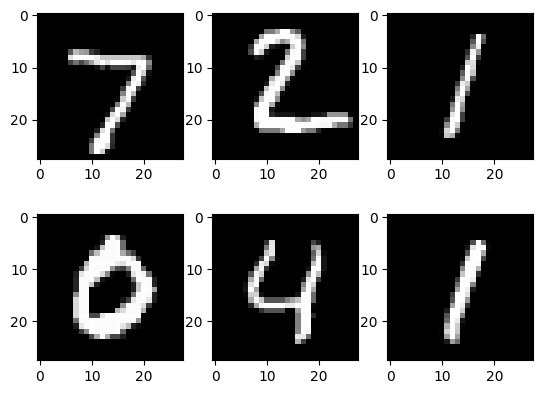

In [ ]:
#1. Import
#2. MNIST
#3. DataLoader, Transformation
#4. Multilayer Neural Net, activation function
#5. Loss and Optimizer
#6. Training Loop (batch training)
#7. Model evaluation
#8. GPU support

#1.
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#Device configuration
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')

#Hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes =  10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#2. MNIST
training_dataset = torchvision.datasets.MNIST(root = './data' , train =True,  transform=transforms.ToTensor(), download=True)
testing_dataset = torchvision.datasets.MNIST(root = './data' , train =False,  transform=transforms.ToTensor())

#3.
training_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size = batch_size, shuffle = True)
testing_loader = torch.utils.data.DataLoader(dataset = testing_dataset, batch_size = batch_size, shuffle = False)

#Transformations
examples = iter(testing_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

#plot
for i in range(6):
  plt.subplot (2, 3, i+1)
  plt.imshow(samples [i] [0], cmap='gray')
  #plt.show()

#4.
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self) .__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out


model = NeuralNet(input_size, hidden_size, num_classes).to(device)

#5.
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

#6.
n_total_steps = len(training_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(training_loader):
    #100, 1, 28, 28
    #100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    #Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 100 == 0:
      print (f'epoch {epoch+1}/{num_epochs}  step {i+1}/{n_total_steps}  loss: {loss.item():.3f}')



#test
with  torch.no_grad():
  no_correct = 0
  no_samples = 0
  for images, labels in testing_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    #value, index
    _, predictions = torch.max(outputs, 1)
    no_samples += labels.shape[0]
    no_correct += (predictions == labels).sum().item()

  accuracy = 100.0 * no_correct / no_samples
  print(f'accuracy: {accuracy}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
for i in range(3):
  num = eval(input('Enter a number: '))
  print ('The square of your number is', num*num)
  print('The loop is now done.')

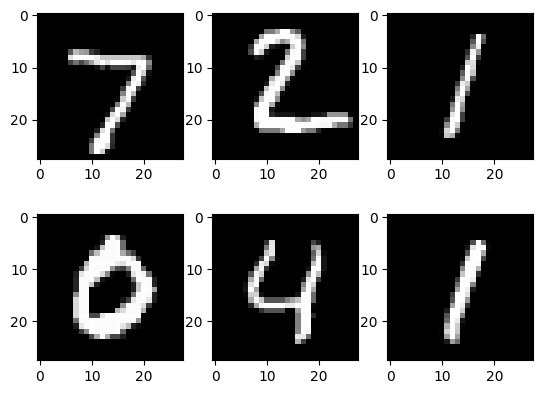

Epoch [1/2], Step [100/600], Loss: 0.3181
Epoch [1/2], Step [200/600], Loss: 0.2424
Epoch [1/2], Step [300/600], Loss: 0.2264
Epoch [1/2], Step [400/600], Loss: 0.1867
Epoch [1/2], Step [500/600], Loss: 0.2833
Epoch [1/2], Step [600/600], Loss: 0.1763
Epoch [2/2], Step [100/600], Loss: 0.1028
Epoch [2/2], Step [200/600], Loss: 0.1009
Epoch [2/2], Step [300/600], Loss: 0.0859
Epoch [2/2], Step [400/600], Loss: 0.0618
Epoch [2/2], Step [500/600], Loss: 0.1878
Epoch [2/2], Step [600/600], Loss: 0.0397
Accuracy of the network on the 10000 test images: 97.11 %


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

To run data/models on an Apple Silicon GPU, use the PyTorch device name "mps" with .to("mps"). MPS stands for Metal Performance Shaders, Metal is Apple's GPU framework.

In [ ]:
import torch

# Set the device
device = "mps" if torch.backends.mps.is_available() else "cpu"

# Create data and send it to the device
x = torch.rand(size=(3, 4)).to(device)
x

#Steps I uploaded in my environment (Just in case)

In [ ]:
pip3 install torch torchvision torchaudio
conda install jupyter pandas numpy matplotlib scikit-learn tqdm
!pip install PyDrive     #For google drive access
!pip install roboflow     #for roboflow
